## Курсовая работа

#### *Студент*:
Супрыгин В.Н.
#### *Тема*:
Решение задач по исследованию данных о супермаркетах США с помощью методик, изученных на курсе "Теория вероятностей и математическая статистика"
#### *Задачи*:

1. Проверка на нормальность. Взаимосвязь величин. Показатели корреляции. Корреляционный анализ.
2. Уравнение регрессии и статистический анализ уравнения регрессии
3. Однофакторный дисперсионный анализ

#### *Данные*:
1. Данные используемые в курсовом взяты с ресурса [kaggle](https://www.kaggle.com/)
2. Датасет: [Supermarket store branches sales analysis](https://www.kaggle.com/datasets/surajjha101/stores-area-and-sales-data)

#### *Описание датасета*:
1. __Store ID__: (Index) ID of the particular store - идентификационный номер супермаркета
2. __Store_Area__: Physical Area of the store in yard square - площадь супермаркета в квадратных ярдах
3. __Items_Available__: Number of different items available in the corresponding store - количество разных наименований товаров доступных в соответствующем супермаркете
4. __DailyCustomerCount__: Number of customers who visited to stores on an average over month - количество покупателей, посетивших супермармаркет в среднем за месяц
5. __Store_Sales__: Sales in (US dollars) that stores made - продажи супермаркетов в долларах США 

### Подготовка

In [1]:
# Загружаем необходимые инструменты

import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from scipy import stats
from scipy.stats import f_oneway
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
import warnings
warnings.filterwarnings("ignore")

In [2]:
# Загружаем датасет

stores = pd.read_csv('E:/GB учеба/Datasets/Stores.csv')
stores

,Store ID,Store_Area,Items_Available,Daily_Customer_Count,Store_Sales
0,1,1659,1961,530,66490
1,2,1461,1752,210,39820
2,3,1340,1609,720,54010
3,4,1451,1748,620,53730
4,5,1770,2111,450,46620
...,...,...,...,...,...
891,892,1582,1910,1080,66390
892,893,1387,1663,850,82080
893,894,1200,1436,1060,76440
894,895,1299,1560,770,96610


In [3]:
# Смотрим на наличие пропусков

stores.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 896 entries, 0 to 895
Data columns (total 5 columns):
 #   Column                Non-Null Count  Dtype
---  ------                --------------  -----
 0   Store ID              896 non-null    int64
 1   Store_Area            896 non-null    int64
 2   Items_Available       896 non-null    int64
 3   Daily_Customer_Count  896 non-null    int64
 4   Store_Sales           896 non-null    int64
dtypes: int64(5)
memory usage: 35.1 KB


In [4]:
# Размерность

stores.shape

(896, 5)

Для исследования будем использовать все признаки, кроме "Store ID", который не несет смысловой нагрузки.

### Задача №1 

#### 1.1 Проверка на нормальность

Примем гипотезу $H_0$ - распределение каждого из признаков в датасете имеет нормальный вид.

Построим гистограммы признаков из датасета. Поверх них нарисуем функции плотностей для нормальных распределений с соответствующими параметрами:

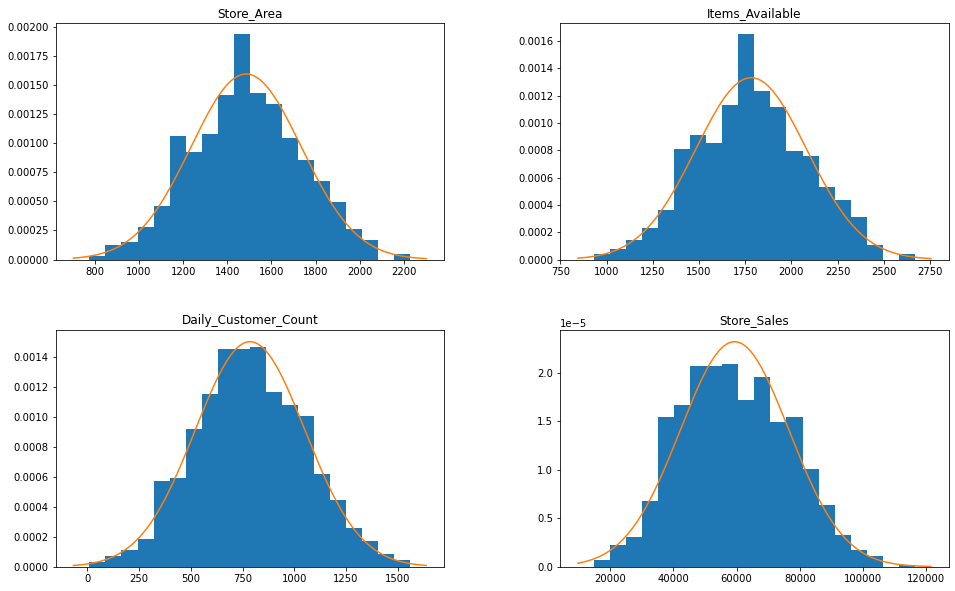

In [5]:
keys = ['Store_Area', 'Items_Available', 'Daily_Customer_Count', 'Store_Sales']

fig, axes = plt.subplots(ncols=2, nrows=2)
fig.set_size_inches(4 * len(keys), 10)
fig.subplots_adjust(wspace=0.3, hspace=0.3)
axes = axes.flatten()

for key, ax in zip(keys, axes):
    ax.hist(stores[key], density=True, bins=20)
    
    loc = stores[key].mean()
    scale = stores[key].std()
    
    x_left, x_right = ax.get_xlim()
    x = np.linspace(x_left, x_right, 1000)
    y = stats.norm.pdf(x, loc=loc, scale=scale)
    
    ax.plot(x, y)
    ax.set_title(key)

В первом приближении можно сказать, что распределения имеют нормальный вид, гипотеза $H_0$ остается в силе.

Посмотрим **Q-Q** кривую:

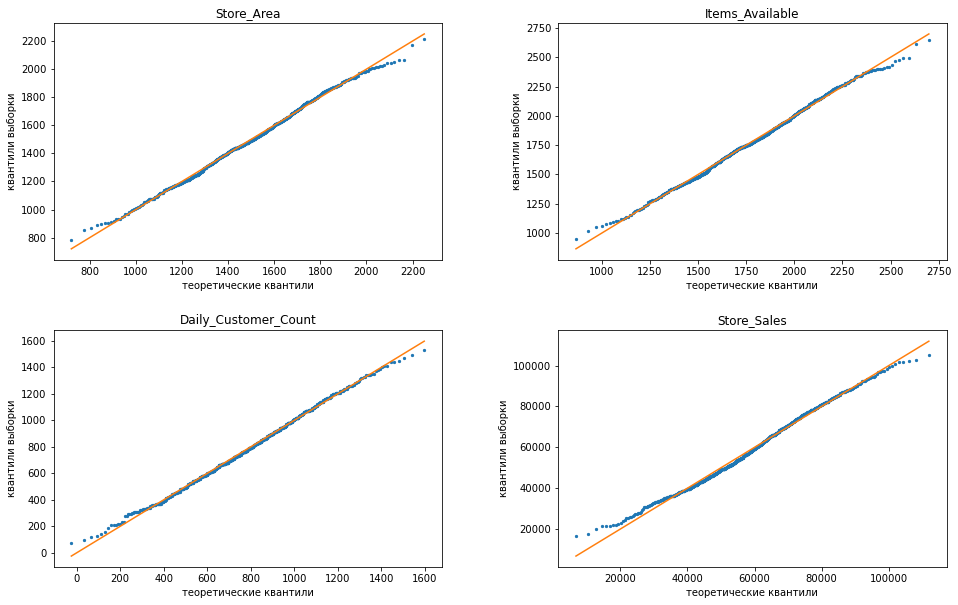

In [6]:
fig, axes = plt.subplots(ncols=2, nrows=2)
fig.set_size_inches(4 * len(keys), 10)
fig.subplots_adjust(wspace=0.3, hspace=0.3)
axes = axes.flatten()

for key, ax in zip(keys, axes):
    samples = stores[key]
    
    loc = samples.mean()
    scale = samples.std()
    
    interval = np.linspace(0, 1, samples.shape[0])[1:-1]
    x = stats.norm.ppf(interval, loc=loc, scale=scale)
    y = np.quantile(samples, interval)
    
    ax.scatter(x, y, s=5)
    ax.plot(x, x, color='C1')
    
    ax.set_title(key)
    ax.set_xlabel('теоретические квантили')
    ax.set_ylabel('квантили выборки')

Как и в случае гистограмм, в первом приближении можно сказать, что распределения имеют нормальный вид, гипотеза  $H_0$ остается в силе.

Выполним проверку по правилу сигм:

In [7]:
for key in keys:
    print(key)
    
    samples = stores[key]
    
    loc = samples.mean()
    scale = samples.std()

    for i in range(1, 4):
        true_value = stats.norm.cdf(i) - stats.norm.cdf(-i)
        sample_value = ((samples >= loc - i * scale) & (samples <= loc + i * scale)).sum() / samples.shape[0]
        
        print(f'{i} sigma(s)')
        print(f'\ttheoretical:\t{true_value}')
        print(f'\tsample:\t\t{sample_value}')
        
    print()

Store_Area
1 sigma(s)
	theoretical:	0.6826894921370859
	sample:		0.6551339285714286
2 sigma(s)
	theoretical:	0.9544997361036416
	sample:		0.9587053571428571
3 sigma(s)
	theoretical:	0.9973002039367398
	sample:		1.0

Items_Available
1 sigma(s)
	theoretical:	0.6826894921370859
	sample:		0.6551339285714286
2 sigma(s)
	theoretical:	0.9544997361036416
	sample:		0.9564732142857143
3 sigma(s)
	theoretical:	0.9973002039367398
	sample:		1.0

Daily_Customer_Count
1 sigma(s)
	theoretical:	0.6826894921370859
	sample:		0.6729910714285714
2 sigma(s)
	theoretical:	0.9544997361036416
	sample:		0.9575892857142857
3 sigma(s)
	theoretical:	0.9973002039367398
	sample:		1.0

Store_Sales
1 sigma(s)
	theoretical:	0.6826894921370859
	sample:		0.6495535714285714
2 sigma(s)
	theoretical:	0.9544997361036416
	sample:		0.9631696428571429
3 sigma(s)
	theoretical:	0.9973002039367398
	sample:		0.9988839285714286



И снова, в первом приближении можно сказать, что распределения имеют нормальный вид, гипотеза  $H_0$ остается в силе.

Проведем проверку с помощью `stats.normaltest`, примем $\alpha = 0.05$:

In [8]:
# alpha = 0.05

stat_1, p_1 = stats.normaltest(stores['Store_Area'])
stat_2, p_2 = stats.normaltest(stores['Items_Available'])
stat_3, p_3 = stats.normaltest(stores['Daily_Customer_Count'])
stat_4, p_4 = stats.normaltest(stores['Store_Sales'])
print('Statistics_Store_Area = ', round(stat_1, 3),  '\t\t\tp-value_Store_Area = ', round(p_1, 5))
print('Statistics_Items_Available = ', round(stat_2, 3),  '\t\tp-value_Items_Available = ', round(p_2, 5))
print('Statistics_Daily_Customer_Count = ', round(stat_3, 3),  '\tp-value_Daily_Customer_Count = ', round(p_3, 5))
print('Statistics_Store_Sales = ', round(stat_4, 3),  '\t\tp-value_Store_Sales = ', round(p_4, 5))

Statistics_Store_Area =  3.963 			p-value_Store_Area =  0.13788
Statistics_Items_Available =  3.955 		p-value_Items_Available =  0.13842
Statistics_Daily_Customer_Count =  3.96 	p-value_Daily_Customer_Count =  0.13808
Statistics_Store_Sales =  16.225 		p-value_Store_Sales =  0.0003


Итоговый вывод следующий:
1. Для признаков `Store_Area`, `Items_Available`, `Daily_Customer_Count` получившееся значения $p-value$ больше заданного уровня значимости $\alpha = 0.05$, поэтому гипотеза $H_0$ для этих признаков принимается и они имееют нормальное рапределение.
2. Для признака `Store_Sales` получившееся значение $p-value$ меньше заданного уровня значимости $\alpha = 0.05$, поэтому гипотеза $H_0$ для этого признака не принимается. Признак `Store_Sales` не имеет нормального рапределения.

#### 1.2 Взаимосвязь величин. Показатели корреляции. Корреляционный анализ.

Посмотрим корреляцию признаков:

In [9]:
stores[['Store_Area', 'Items_Available', 'Daily_Customer_Count', 'Store_Sales']].corr()

,Store_Area,Items_Available,Daily_Customer_Count,Store_Sales
Store_Area,1.000000,0.998891,-0.041423,0.097474
Items_Available,0.998891,1.000000,-0.040978,0.098849
Daily_Customer_Count,-0.041423,-0.040978,1.000000,0.008629
Store_Sales,0.097474,0.098849,0.008629,1.000000


Как видно из получившейся матрицы, у признаков `Store_Area` и `Items_Available` наблюдается наличие *линейной зависимости*, что, в принципе логично, при увеличении площади супермаркета - увеличивается и количество наименований товаров, которые там можно разместить. С другой стороны эти признаки не коррелируются с посещаемостью покупателей и продажами, так как продажи как выяснено выше не имеют нормальго распределения. 

Посмотрим ранговую корреляцию:

In [10]:
stores[['Store_Area', 'Items_Available', 'Daily_Customer_Count', 'Store_Sales']].corr(method='kendall')

,Store_Area,Items_Available,Daily_Customer_Count,Store_Sales
Store_Area,1.000000,0.971571,-0.024767,0.060132
Items_Available,0.971571,1.000000,-0.024281,0.061631
Daily_Customer_Count,-0.024767,-0.024281,1.000000,0.013662
Store_Sales,0.060132,0.061631,0.013662,1.000000


Из получившейся матрицы видно, что картина не сильно изменилась по сравнению с расчетом по методу Пирсона, поэтому общий вывод можно сделать следующий:
- Вероятно, что между признаками `Store_Area` и `Items_Available` есть линейная зависимость;
- Несмотря на то, что в совокупности между признаками `Daily_Customer_Count` и `Store_Sales` нет линейной зависимости с признаками `Store_Area` и `Items_Available`, возможно есть нелинейная зависимость, которую не улавливают коэффициенты корреляции.

### Задача №2 

Проверим гипотезы, что признаки `Store_Area` и `Items_Available` имеют линейную зависимость и, применимости модели линейной регрессии к предсказаниям продаж супермаркетов, исходя из имеющихся признаков.

#### 2.1 Уравнение регрессии

Построим для признаков `Store_Area` и `Items_Available` модель линейной регрессии (парной регресии):

In [11]:
x1 = np.array(stores['Store_Area'])
y1 = np.array(stores['Items_Available'])

In [12]:
# Коэффициенты линейной регрессии

b1 = (np.mean(x1 * y1) - np.mean(x1) * np.mean(y1)) / (np.mean(x1 ** 2) - np.mean(x1) ** 2)
b0 = np.mean(y1) - b1 * np.mean(x1)

b0, b1

(3.96648569731974, 1.1970228485974073)

Таким образом модель регрессии имеет вид:
$$y_1 = 3.97 + 1.20 \cdot x_1$$
где
- $x_1$ — площадь супермаркета,
- $y_1$ — количество наименований товара.

то есть с увеличением площади супермаркета на 1 квадратный ярд количество наименований товара возрастет на 1.20.

Посмотрим полученные результаты на графике:

Text(0, 0.5, 'Количество наименований товара')

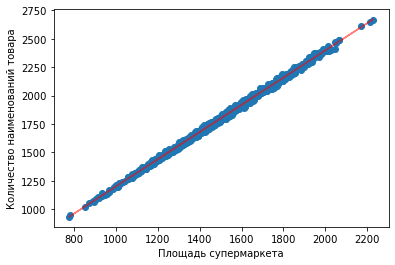

In [13]:
ox = x1
oy = b0 + b1 * ox

plt.scatter(x1, y1)
plt.plot(ox, oy, color='red', alpha=0.5)

plt.xlabel('Площадь супермаркета')
plt.ylabel('Количество наименований товара')

Теперь попробуем построить модель регрессии, которая будет предсказывать продажи супермаркета в зависимости от его площади, количества наименований товара и посещаемости покупателей:

In [14]:
x2 = stores[['Store_Area', 'Items_Available', 'Daily_Customer_Count']].values
y2 = stores['Store_Sales'].values

In [15]:
x2.shape, y2.shape

((896, 3), (896,))

К массиву `x2` добавляем столбец из $1$, соответствующий фиктивному фактору, чтобы избавиться от линейно зависимых признаков `Store_Area`, `Items_Available`:

In [16]:
ones = np.ones((x2.shape[0], 1))
x2 = np.hstack((ones, x2))
x2

array([[1.000e+00, 1.659e+03, 1.961e+03, 5.300e+02],
       [1.000e+00, 1.461e+03, 1.752e+03, 2.100e+02],
       [1.000e+00, 1.340e+03, 1.609e+03, 7.200e+02],
       ...,
       [1.000e+00, 1.200e+03, 1.436e+03, 1.060e+03],
       [1.000e+00, 1.299e+03, 1.560e+03, 7.700e+02],
       [1.000e+00, 1.174e+03, 1.429e+03, 1.110e+03]])

In [17]:
x2.shape

(896, 4)

In [18]:
# Определитель матрицы  𝑋⊤𝑋

XTX = x2.T.dot(x2)

np.linalg.det(XTX)

5.6384543368396826e+23

Определитель достаточно близок к нулю, поэтому вероятны проблемы с методом.

In [19]:
XTX_inv = np.linalg.inv(XTX)

b = XTX_inv.dot(x2.T).dot(y2)

print(b)

[ 4.85677788e+04 -3.90355699e+01  3.82341546e+01  8.04613301e-01]


In [20]:
# Проверяем втроенным методом

model = LinearRegression().fit(x2, y2)
model.intercept_, model.coef_

(48567.77884482471,
 array([  0.        , -39.03556986,  38.23415464,   0.8046133 ]))

Таким образом модель регрессии имеет вид:
$$y = 48567.78 -39.036 \cdot x_1 + 38.234 \cdot x_2 + 0.805 \cdot x_3$$
где
- $x_1$ — площадь супермаркета,
- $x_2$ — количество наименований товара,
- $x_3$ — посещаемость покупателями.

Определим коэффициенты детерминации для полученных выше моделей:

In [21]:
# 1-ая модель

z1 = b0 + b1 * x1

In [22]:
def sum_of_squares(samples):
    return ((samples - samples.mean()) ** 2).sum()

In [23]:
R1 = 1 - ((y1 - z1)**2).sum() / sum_of_squares(y1)
R1

0.9977827319395582

Коэффициент детерминации практически равен $1$, что означает, что практически $100 \%$ дисперсии переменной $y_1$ учитывается или объясняется моделью (что лишь подтверждает выводы выше).

In [24]:
# 2-ая модель

z2 = x2.dot(b)

In [25]:
R2 = 1 - ((y2 - z2) ** 2).sum() / sum_of_squares(y2)
R2

0.0106480710451613

Как видно, коэффициент детерминации для второй модели оказался очень низок. Выбранные признаки объясняют очень малый процент дисперсии переменной $y_2$ (что подтверждает выводы выше).

#### 2.2 Статистический анализ уравнения регрессии

Определим значимый уровень соответствия модели данным с помощью теста Фишера, где уровень значимости принимаем $\alpha = 0.05$ и квантиль считаем с помощью функции `scipy.stats.f.ppf`:

In [26]:
# 1-ая модель

n = x1.shape[0]
m = 1

k1_1 = m
k2_1 = n - m - 1

k1_1, k2_1

(1, 894)

In [27]:
# Критическая область

alpha = 0.05

t_1 = stats.f.ppf(1 - alpha, k1_1, k2_1)
t_1

3.8518814520547737

In [28]:
# Статистика

F_1 = (R1 / k1_1) / ((1 - R1) / k2_1)
F_1

402304.88061792764

Статистика попала в критическую область, 1-ое уравнение регрессии признаётся значимым. Таким образом можно сделать вывод, что признаки `Store_Area` и `Items_Available` имеют линейную зависимость. 

In [29]:
# 2-ая модель

n = x2.shape[0]
m = x2.shape[1] - 1  # убираем фиктивный столбец

k1_2 = m
k2_2 = n - m - 1

k1_2, k2_2

(3, 892)

In [30]:
# Критическая область

t_2 = stats.f.ppf(1 - alpha, k1_2, k2_2)
t_2

2.6148829691472524

In [31]:
# Статистика

F_2 = (R2 / k1_2) / ((1 - R2) / k2_2)
F_2

3.200101364104664

In [32]:
model_ = sm.OLS(y2, x2)
results = model_.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.011
Model:                            OLS   Adj. R-squared:                  0.007
Method:                 Least Squares   F-statistic:                     3.200
Date:                Thu, 04 Aug 2022   Prob (F-statistic):             0.0228
Time:                        10:30:29   Log-Likelihood:                -10004.
No. Observations:                 896   AIC:                         2.002e+04
Df Residuals:                     892   BIC:                         2.004e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       4.857e+04   3908.828     12.425      0.0

Статистика попала в критическую область, можно сказать, что 2-ое уравнение регрессии можно признать значимым, однако в полученном `summary()` видно, что для признаков `Store_Area`, `Items_Available` и `Daily_Customer_Count` и `Store_Sales` $p-value$ больше заданного уровня значимости $\alpha = 0.05$, соответственно признаки признаются *незначимыми* и не вносят вклада в модель. Таким образом можно сделать вывод, что
- Модель линейной регрессии на используемом датасете не может быть применена для корректного прогнозирования продаж супермаркетов;
- Необходимо привнести другие признаки, либо использовать другие типы моделей.

### Задача №3

In [33]:
# stores[stores["Items_Available"] <= 1000] - 2 значения;

# stores[(stores["Items_Available"] > 1000) & (stores["Items_Available"] <= 1500)] - 170 значений;

# stores[(stores["Items_Available"] > 1500) & (stores["Items_Available"] <= 2000)] - 511 значений;

# stores[stores["Items_Available"] > 2000] - 213 значений.

Проведем однофакторный дисперсионный анализ для проверки гипотезы о равенстве средней посещаемости покупателями для групп супермаркетов с количеством наименований товаров:
- от 1000 до 1500;
- от 1500 до 2000;
- свыше 2000.

Сделаем выборки:

In [34]:
DCC_1000_1500 = stores[(stores["Items_Available"] >= 1000) & (stores["Items_Available"] <= 1500)]["Daily_Customer_Count"].values

DCC_1500_2000 = stores[(stores["Items_Available"] > 1500) & (stores["Items_Available"] <= 2000)]["Daily_Customer_Count"].values

DCC_2000 = stores[stores["Items_Available"] > 2000]["Daily_Customer_Count"].values

Выборочные средние по каждой группе:

In [35]:
DCC_1000_1500_mean = DCC_1000_1500.mean()
DCC_1500_2000_mean = DCC_1500_2000.mean()
DCC_2000_mean = DCC_2000.mean()

DCC_1000_1500_mean, DCC_1500_2000_mean, DCC_2000_mean

(804.4705882352941, 778.8258317025441, 788.4976525821596)

Видно, что средние значения посещаемости не сильно разнятся. Проверим статистическую значимость этого отличия:

In [36]:
DCC_concat = np.concatenate([DCC_1000_1500, DCC_1500_2000, DCC_2000])

DCC_concat_mean = DCC_concat.mean()
DCC_concat_mean

786.006711409396

Значения $S_b$ и $S_{w}$:

In [37]:
n1 = DCC_1000_1500.shape[0]
n2 = DCC_1500_2000.shape[0]
n3 = DCC_2000[0]


S2_b = n1 * (DCC_1000_1500_mean - DCC_concat_mean) ** 2 + n2 * (DCC_1500_2000_mean - DCC_concat_mean) ** 2 + n3 * (DCC_2000_mean - DCC_concat_mean) ** 2

S2_w = ((DCC_1000_1500 - DCC_1000_1500_mean) ** 2).sum() + ((DCC_1500_2000 - DCC_1500_2000_mean) ** 2).sum() + ((DCC_2000 - DCC_2000_mean) ** 2).sum()

S2_b, S2_w

(87097.39368105165, 62858217.100788996)

In [38]:
print(S2_b + S2_w)

62945314.494470045


In [39]:
print(((DCC_concat - DCC_concat_mean) ** 2).sum())

62943843.95973155


In [40]:
# значения не строго равны, затрудняюсь найти объяснение, но полагаю, что можно принять как выполнение равенства

Оценки дисперсий:

In [41]:
k = 3
n = n1 + n2 + n3

k1 = k - 1
k2 = n - k

sigma2_b = S2_b / k1
sigma2_w = S2_w / k2

sigma2_b, sigma2_w

(43548.69684052582, 55725.36977020301)

Значение статистики $T$:

In [42]:
T = sigma2_b / sigma2_w
T

0.781487803851448

Зададим уровень значимости $\alpha = 0.05$ и определяем критическое значение $F_{crit}$:

In [43]:
alpha = 0.05

F_crit = stats.f.ppf(1 - alpha, k1, k2)
F_crit

3.0037024175415845

In [44]:
p = 1 - stats.f.cdf(T, k1, k2)
p

0.4579721602475516

In [45]:
T > F_crit

False

Видим, что $T < F_{crit}$, поэтому заключаем, что отличие средней посещаемости не является статистически значимым, поэтому гипотеза о равенстве средней посещаемости покупателями принимается (что, в принципе, логично, если предположить, что количество "нужных" для покупателей наименований товаров в супермаркетах примерно одинаково и разница по остальным наименованиям не особо влияет на посещаемость, понятно, что на посещаемость могут влиять и множества других признаков (количество населения, удаленность, рэйтинг и т.д.)).

Проверим втроенным методом:

In [46]:
f_oneway(DCC_1000_1500, DCC_1500_2000, DCC_2000)

F_onewayResult(statistic=0.606869991201628, pvalue=0.5452793644611091)

In [47]:
# значения немного отличаются от расчитанных вручную, но общий вывод совпадает